In [117]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels as sm
from tabulate import tabulate
import seaborn as sns
import sklearn
from scipy import stats
import scipy.stats as stats
from scipy.stats import chi2_contingency
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
from statsmodels.formula.api import ols
import scikit_posthocs as sp
import statsmodels.stats.multicomp as mc

import warnings

In [94]:
df = pd.read_csv(r'/labs/mignot/researchers/kcederb/Exercise and RLS Survey/2022.06.27_Python Final DF_RLS and Ex Survey.csv')
print("Number of participants in DF:", len(df['ResponseId']))
print()

#Determine missing values
print("Number of missing values in DataFrame")
print("Positive experiences:", df['pos_exp_better_cat'].isna().sum().sum())
print("Negative experiences time of day:", df['pos_exp_TOD_better'].isna().sum().sum())
print("Negative experiences:", df['neg_exp_worse_cat'].isna().sum().sum())
print("Negative experiences time of day:", df['neg_exp_TOD_worse'].isna().sum().sum())
print()

#Remove missing
df = df.dropna(subset=['pos_exp_better_cat'])
print("Number of participants in DF:", len(df['ResponseId']))
print()

#Determine new missing values
print("Number of missing values in DataFrame after removing missing cases")
print("Positive experiences:", df['pos_exp_better_cat'].isna().sum().sum())
print("Negative experiences time of day:", df['pos_exp_TOD_better'].isna().sum().sum())
print("Negative experiences:", df['neg_exp_worse_cat'].isna().sum().sum())
print("Negative experiences time of day:", df['neg_exp_TOD_worse'].isna().sum().sum())

Number of participants in DF: 544

Number of missing values in DataFrame
Positive experiences: 16
Negative experiences time of day: 16
Negative experiences: 17
Negative experiences time of day: 213

Number of participants in DF: 528

Number of missing values in DataFrame after removing missing cases
Positive experiences: 0
Negative experiences time of day: 0
Negative experiences: 1
Negative experiences time of day: 197


In [95]:
#Create relevant variables 

#BMI (kg/m^2)

df['height_m'] = ((df['dem_height_1']*12) + df['dem_height_2'])/39.37
df['weight_kg'] = (df['dem_weight'])/2.205
df['BMI'] = (df['weight_kg']/(df['height_m']*df['height_m']))

df['BMI'].mask(df['BMI']<10, np.nan, inplace=True)
df['BMI'].describe()

count    526.000000
mean      26.547737
std        5.979936
min       16.092426
25%       22.503046
50%       25.389714
75%       29.526585
max       53.240914
Name: BMI, dtype: float64

# Perceptions of Exercise - Improves

In [96]:
#Does exercise make your symptoms better (0=definitely no; 1=sometimes; 2=definitely yes)

print("Number of participants with responses:", len(df['pos_exp_better_cat']))
print(df['pos_exp_better_cat'].value_counts())
print()
print("Percentage of people who think exercise definitely helps their RLS:", ((126)/len(df['pos_exp_better_cat']))*100)
print("Percentage of people who think exercise sometimes helps their RLS:", ((253)/len(df['pos_exp_better_cat']))*100)
print("Percentage of people who think exercise definitely DOES NOT help their RLS:", ((149)/len(df['pos_exp_better_cat']))*100)


Number of participants with responses: 528
1.0    253
0.0    149
2.0    126
Name: pos_exp_better_cat, dtype: int64

Percentage of people who think exercise definitely helps their RLS: 23.863636363636363
Percentage of people who think exercise sometimes helps their RLS: 47.91666666666667
Percentage of people who think exercise definitely DOES NOT help their RLS: 28.219696969696972


# Perceptions of Exercise - Worsens

In [97]:
#Does exercise make your symptoms worse(0=definitely no; 1=sometimes; 2=definitely yes)

print("Number of responses:", len(df['neg_exp_worse_cat'])-df['neg_exp_worse_cat'].isna().sum())
print(df['neg_exp_worse_cat'].value_counts())
print()
print("Percentage of people who think exercise definitely DOES NOT worsen their RLS:", ((248)/(len(df['neg_exp_worse_cat'])-df['neg_exp_worse_cat'].isna().sum()))*100)
print("Percentage of people who think exercise sometimes worsens their RLS:", ((212)/(len(df['neg_exp_worse_cat'])-df['neg_exp_worse_cat'].isna().sum()))*100)
print("Percentage of people who think exercise definitely worsens their RLS:", ((67)/(len(df['neg_exp_worse_cat'])-df['neg_exp_worse_cat'].isna().sum()))*100)

Number of responses: 527
0.0    248
1.0    212
2.0     67
Name: neg_exp_worse_cat, dtype: int64

Percentage of people who think exercise definitely DOES NOT worsen their RLS: 47.05882352941176
Percentage of people who think exercise sometimes worsens their RLS: 40.22770398481973
Percentage of people who think exercise definitely worsens their RLS: 12.7134724857685


# Define and Assess RLS Characteristics

In [98]:
df['rls_severity'] = df['sIRLS_1'] + df['sIRLS_2'] + df['sIRLS_3'] + df['sIRLS_4'] + df['sIRLS_5'] + df['sIRLS_6'] + df['sIRLS_7'] + df['sIRLS_8'] + df['sIRLS_9'] + df['sIRLS_10']
df['rls_severity'].describe()
#df['rls_severity'].value_counts()

count    528.000000
mean      20.024621
std        8.205691
min        0.000000
25%       15.000000
50%       20.000000
75%       26.000000
max       39.000000
Name: rls_severity, dtype: float64

In [99]:
#recode into severity categories
    
def rls_func(x):
    if x==0:
        return "None"
    if 0<x<11:
        return "Mild"
    if 10<x<21:
        return "Moderate"
    if 20<x<31:
        return "Severe"
    else:
        return "Very Severe"


df['rls_groups'] = df['rls_severity'].apply(rls_func)
print(len(df['rls_groups'])-df['rls_groups'].isna().sum())
print(df['rls_groups'].value_counts())
print()
print("percentage with Very Severe symptoms:",48/528*100)
print("percentage with Severe symptoms:",213/528*100)
print("percentage with Moderate symptoms:",198/528*100)
print("percentage with Mild symptoms:",56/528*100)
print("percentage without symptoms:",13/528*100)

528
Severe         213
Moderate       198
Mild            56
Very Severe     48
None            13
Name: rls_groups, dtype: int64

percentage with Very Severe symptoms: 9.090909090909092
percentage with Severe symptoms: 40.340909090909086
percentage with Moderate symptoms: 37.5
percentage with Mild symptoms: 10.606060606060606
percentage without symptoms: 2.462121212121212


In [100]:
#treatment

print(df['rls_treated'].value_counts())
print(df.groupby('rls_treated')['rls_groups'].value_counts())
print()
print("number of people responding to responsiveness question:", 357+114+8)
print(df['rls_med_responsive'].value_counts())
print()
print("of the people actively taking medicitions:")
print("Partially responsive:", (357/479)*100)
print("completely responsive:", (114/479)*100)
print("Non-responsive:", (8/479)*100)

1.0    479
0.0     49
Name: rls_treated, dtype: int64
rls_treated  rls_groups 
0.0          Moderate        21
             Severe          20
             Mild             4
             Very Severe      3
             None             1
1.0          Severe         193
             Moderate       177
             Mild            52
             Very Severe     45
             None            12
Name: rls_groups, dtype: int64

number of people responding to responsiveness question: 479
Partially Relieves Symptoms     357
Completely Relieves Symptoms    114
No Relief of Symptoms             8
Name: rls_med_responsive, dtype: int64

of the people actively taking medicitions:
Partially responsive: 74.53027139874739
completely responsive: 23.799582463465555
Non-responsive: 1.6701461377870561


In [101]:
#Previous diagnosis of rls

print(df['rls_diagnosis'].value_counts())
print()
print("Percentage of people who recieved a diagnosis of RLS:", (511/(len(df['rls_diagnosis'])-df['rls_diagnosis'].isna().sum()))*100)
df.groupby('rls_diagnosis')['rls_severity'].describe()

1.0    511
0.0     17
Name: rls_diagnosis, dtype: int64

Percentage of people who recieved a diagnosis of RLS: 96.78030303030303


,count,mean,std,min,25%,50%,75%,max
rls_diagnosis,,,,,,,,
0.0,17.0,18.352941,7.557622,0.0,13.0,21.0,23.0,28.0
1.0,511.0,20.080235,8.227371,0.0,15.0,20.0,26.0,39.0


In [102]:
#Age at diagnosis

df['rls_diag_year'] = df['rls_diag_year'].where(df['rls_diag_year']<100) #remove anyone who included the year of diagnosis
df['rls_diag_year'].describe()

count    505.000000
mean      47.801980
std       15.238722
min        4.000000
25%       37.000000
50%       50.000000
75%       60.000000
max       84.000000
Name: rls_diag_year, dtype: float64

In [103]:
#RLS duration - How long have you had symptoms?
df['rls_duration_1'] = df['rls_duration_1'].where(df['rls_duration_1']<100) #remove people who listed a duration more than 100 years
df['rls_duration_1'].describe()

count    527.000000
mean      30.005693
std       18.177880
min        1.000000
25%       15.000000
50%       28.000000
75%       42.000000
max       81.000000
Name: rls_duration_1, dtype: float64

(array([ 23.,  10.,   7.,  13.,  19.,  34.,  79.,  88., 127., 111.]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <BarContainer object of 10 artists>)

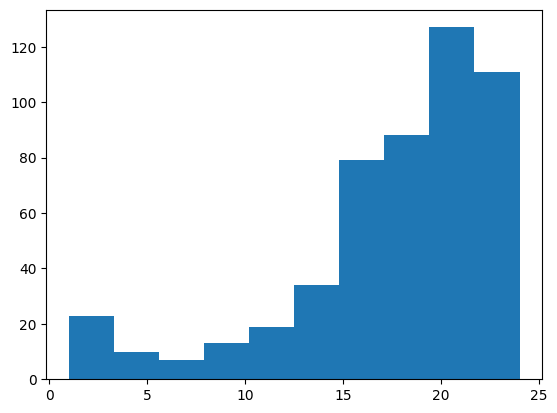

In [104]:
df['rls_peak_hour_1'].value_counts()
df['rls_peak_hour'] = df['rls_peak_hour_1'].replace(0,24)
plt.hist(df['rls_peak_hour'])

# IPAQ Physical Activity Scoring

count    369.000000
mean      53.178862
std       43.929606
min        0.000000
25%       30.000000
50%       45.000000
75%       60.000000
max      240.000000
Name: IPAQ_2a, dtype: float64

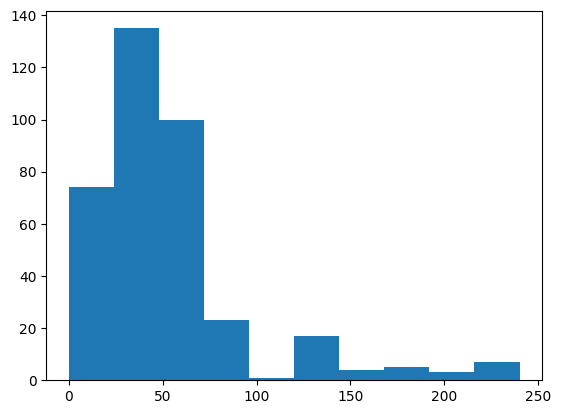

In [105]:
df['IPAQ_2a'] = df['IPAQ_2'].abs()
df['IPAQ_2a'].values[df['IPAQ_2a'] > 240] = 240
df['IPAQ_2trunc'] = df['IPAQ_2a'].apply(lambda x: [x if x < 240 else 240])
plt.hist(df['IPAQ_2a'])
df['IPAQ_2a'].describe()

count    528.000000
mean      20.409091
std       17.791947
min        0.000000
25%        0.000000
50%       16.000000
75%       32.000000
max       56.000000
Name: IPAQ_vig, dtype: float64

Correlation between RLS Severity and Self-Reported Vigorous Physical Activity
Correlation Coefficient: -0.08642300764011572
p-value= 0.047160279350426375
Inverse relationship: more PA associated with lower RLS severity


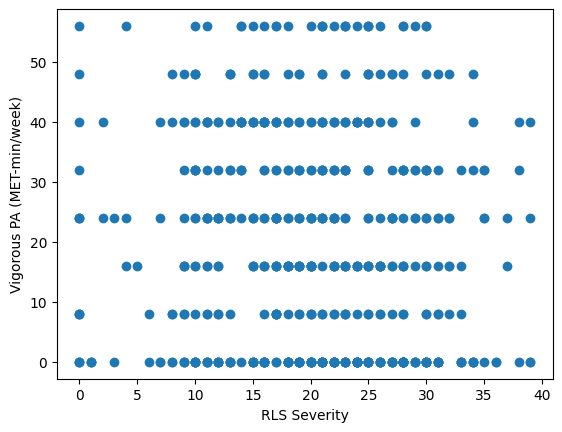

In [106]:
df['IPAQ_vig'] = 8*df['IPAQ_1_4']#*df['IPAQ_2a']
print(df['IPAQ_vig'].describe())
x=df['rls_severity']
y=df['IPAQ_vig']
plt.scatter(x,y)
plt.xlabel('RLS Severity')
plt.ylabel('Vigorous PA (MET-min/week)')
print()

print("Correlation between RLS Severity and Self-Reported Vigorous Physical Activity")
rls_sev = df['rls_severity']
result = stats.spearmanr(rls_sev, df['IPAQ_vig'], nan_policy='omit')
if result.pvalue<0.05:
    print("Correlation Coefficient:",result.correlation)
    print("p-value=",result.pvalue)
    if result.correlation<0:
        print("Inverse relationship: more PA associated with lower RLS severity")
    else:
        print("more PA associted with higher RLS severity")
else:
    print("Nonsignificant Correlation", result.correlation)

count    427.000000
mean      52.281030
std       42.921817
min        1.000000
25%       30.000000
50%       40.000000
75%       60.000000
max      240.000000
Name: IPAQ_4a, dtype: float64

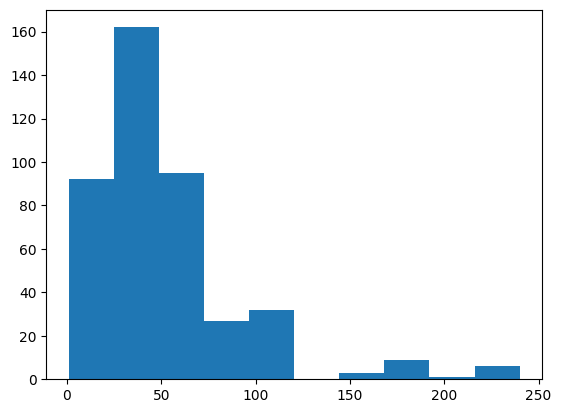

In [107]:
df['IPAQ_4a'] = df['IPAQ_4'].abs().astype(float)
df['IPAQ_4a'].values[df['IPAQ_4a'] > 240] = 240
plt.hist(df['IPAQ_4a'])
df['IPAQ_4a'].describe()

count    427.000000
mean      52.281030
std       42.921817
min        1.000000
25%       30.000000
50%       40.000000
75%       60.000000
max      240.000000
Name: IPAQ_4a, dtype: float64

Nonsignificant Correlation -0.06539978667901386


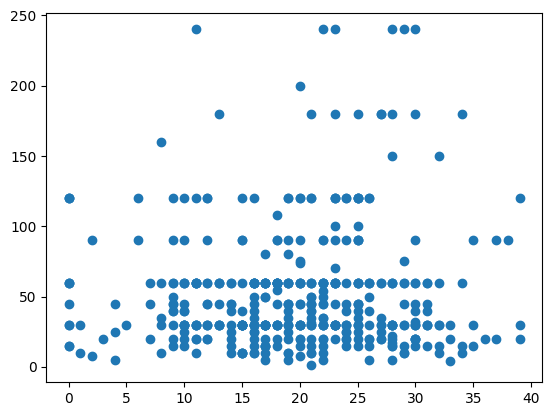

In [108]:
df['IPAQ_mod'] = 4*df['IPAQ_3_19']#*df['IPAQ_4a']
print(df['IPAQ_4a'].describe())
plt.scatter(df['rls_severity'],df['IPAQ_4a'])

print()
result = stats.spearmanr(rls_sev, df['IPAQ_mod'], nan_policy='omit')
if result.pvalue<0.05:
    print("Correlation Coefficient:",result.correlation)
    print("p-value=",result.pvalue)
    if result.correlation<0:
        print("Inverse relationship: more PA associated with lower RLS severity")
    else:
        print("more PA associted with higher RLS severity")
else:
    print("Nonsignificant Correlation", result.correlation)

count    528.000000
mean      16.481250
std        7.345319
min        0.000000
25%        9.900000
50%       19.800000
75%       23.100000
max       23.100000
Name: IPAQ_walk, dtype: float64

Nonsignificant Correlation -0.03926483989165709


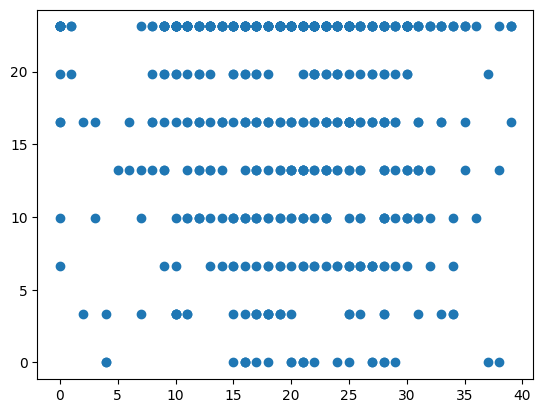

In [109]:
df['IPAQ_6a'] = df['IPAQ_6'].abs()
df['IPAQ_6a'].values[df['IPAQ_6a'] > 240] = 240
df['IPAQ_walk'] = 3.3*df['IPAQ_5_1']#*df['IPAQ_6a']
print(df['IPAQ_walk'].describe())
plt.scatter(df['rls_severity'],df['IPAQ_walk'])

print()
result = stats.spearmanr(rls_sev, df['IPAQ_walk'], nan_policy='omit')
if result.pvalue<0.05:
    print("Correlation Coefficient:",result.correlation)
    print("p-value=",result.pvalue)
    if result.correlation<0:
        print("Inverse relationship: more PA associated with lower RLS severity")
    else:
        print("more PA associted with higher RLS severity")
else:
    print("Nonsignificant Correlation", result.correlation)

count    528.000000
mean      48.572159
std       26.093389
min        0.000000
25%       27.250000
50%       46.600000
75%       67.100000
max      107.100000
Name: IPAQ_Total, dtype: float64

Correlation Coefficient: -0.08840713749886019
p-value= 0.04229515610080622
Inverse relationship: more PA associated with lower RLS severity


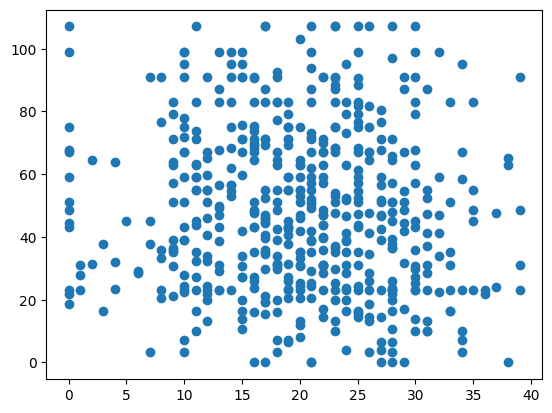

In [110]:
df['IPAQ_Total'] = df['IPAQ_vig']+df['IPAQ_mod']+df['IPAQ_walk']
print(df['IPAQ_Total'].describe())
plt.scatter(df['rls_severity'],df['IPAQ_Total'])

print()
result = stats.spearmanr(rls_sev, df['IPAQ_Total'], nan_policy='omit')
if result.pvalue<0.05:
    print("Correlation Coefficient:",result.correlation)
    print("p-value=",result.pvalue)
    if result.correlation<0:
        print("Inverse relationship: more PA associated with lower RLS severity")
    else:
        print("more PA associted with higher RLS severity")
else:
    print("Nonsignificant Correlation", result.correlation)

# IPAQ Sedentary Time

count    528.000000
mean       8.168718
std       13.001046
min        0.500000
25%        4.000000
50%        6.000000
75%        8.000000
max      210.500000
Name: IPAQ_sit_hrs, dtype: float64
Number of people who reported more than 24 hours/day of sitting: 22

count    506.000000
mean       6.162681
std        3.343153
min        0.500000
25%        4.000000
50%        5.500000
75%        8.000000
max       21.000000
Name: IPAQ_sit_hrs, dtype: float64

Nonsignificant Correlation -0.046172627451343345


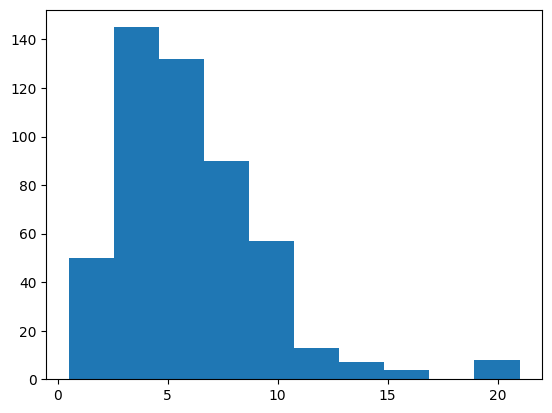

In [111]:
df['IPAQ_sit_min'] = (df['IPAQ_7_1']*60)+df['IPAQ_7_3'] #hours to minutes then add minutes
df['IPAQ_sit_hrs'] = df['IPAQ_sit_min']/60
print(df['IPAQ_sit_hrs'].describe())
print("Number of people who reported more than 24 hours/day of sitting:", len(df.where(df['IPAQ_sit_hrs']>24).dropna(how='all')))
#replace invalid sitting times (>24 hours) with NAN
df['IPAQ_sit_hrs'].where(df['IPAQ_sit_hrs'] < 24, np.nan, inplace=True)
print()
print(df['IPAQ_sit_hrs'].describe())
plt.hist(df['IPAQ_sit_hrs'])

print()
result = stats.spearmanr(df['rls_severity'], df['IPAQ_sit_hrs'], nan_policy='omit')
if result.pvalue<0.05:
    print("Correlation Coefficient:",result.correlation)
    print("p-value=",result.pvalue)
    if result.correlation<0:
        print("Inverse relationship: more sitting associated with lower RLS severity")
    else:
        print("more sitting associted with higher RLS severity")
else:
    print("Nonsignificant Correlation", result.correlation)

# Demographic Characteristics Summary

In [112]:
#Continuous Variables
demo_cont_df = df[['ResponseId','dem_age','BMI','rls_severity','rls_duration_1','IPAQ_Total','IPAQ_sit_hrs']]
#demo_cont_df = demo_cont_df.where(demo_cont_df['IPAQ_sit_hrs']<24.0000001)
demo_cont_df.describe()

,dem_age,BMI,rls_severity,rls_duration_1,IPAQ_Total,IPAQ_sit_hrs
count,528.000000,526.000000,528.000000,527.000000,528.000000,506.000000
mean,68.136364,26.547737,20.024621,30.005693,48.572159,6.162681
std,10.014807,5.979936,8.205691,18.177880,26.093389,3.343153
min,18.000000,16.092426,0.000000,1.000000,0.000000,0.500000
25%,63.000000,22.503046,15.000000,15.000000,27.250000,4.000000
50%,69.000000,25.389714,20.000000,28.000000,46.600000,5.500000
75%,75.000000,29.526585,26.000000,42.000000,67.100000,8.000000
max,89.000000,53.240914,39.000000,81.000000,107.100000,21.000000


In [114]:
#Dichotomous/Categorical Variables
demo_dich_df = df[['ResponseId','dem_sex','dem_race','rls_groups','rls_peak_hour','rls_bilateral','rls_pregnancy_start','rls_treated','rls_med_responsive','rls_med_frequency','secondary_conditions','plm_presence']]

#Sex
print(demo_dich_df['dem_sex'].value_counts())
print("Percentage of Females:", 341/(341+186)*100)
print()

#Race
print(demo_dich_df['dem_race'].value_counts())
print("Percentage White:", 512/(512+4+3+3+2+1+1)*100)
print()

#RLS_groups
print(demo_dich_df['rls_groups'].value_counts())
print()
print("None: 13", 13/(13+48+56+198+213)*100)
print("Mild: 56", 56/(13+48+56+198+213)*100)
print("Moderate: 198", 198/(13+48+56+198+213)*100)
print("Severe: 213", 213/(13+48+56+198+213)*100)
print("Very Severe: 48", 48/(13+48+56+198+213)*100)
print()
print("total percentages accounted for:", 2+11+38+40+9)
print()

#RLS Peak Onset Time
print("Median peak onset time:", demo_dich_df['rls_peak_hour'].median())
print(demo_dich_df['rls_peak_hour'].describe())
print()

#bilateral vs. unilateral
print(demo_dich_df['rls_bilateral'].value_counts())
print("Percentage Bilateral:", 504/(504+13+11)*100)
print()

#Pregnancy Related
print(demo_dich_df['rls_pregnancy_start'].value_counts())
print("Percentage related to pregnancy", 34/(271+35+34)*100)
print()

#Medication Use
print(demo_dich_df['rls_treated'].value_counts())
print("Percentage on medications", 479/(479+49)*100)
print()

#Responsive to medications
print(demo_dich_df['rls_med_responsive'].value_counts())
print("Percentage non-responsive to medication", 8/(357+114+8)*100)
print()

#Medication frequency
print(demo_dich_df['rls_med_frequency'].value_counts())
print("Percentage regularly taking meds", 454/(454+24)*100)
print()

#prsenece of secondary condtions
print(demo_dich_df['secondary_conditions'].value_counts())
print("Percentage with secondary condtions", 141/(141+11+375)*100)
print()

#presence of PLMs
print(demo_dich_df['plm_presence'].value_counts())
print("Percentage with PLMs", 332/(332+144+52)*100)

Female                  341
Male                    186
Prefer not to answer      1
Name: dem_sex, dtype: int64
Percentage of Females: 64.70588235294117

White                                  512
Other                                    4
Two or More                              3
Latino/Latina                            3
Asian                                    2
Native Hawaiian or Pacific Islander      1
American Indian or Alaska Native         1
Name: dem_race, dtype: int64
Percentage White: 97.33840304182509

Severe         213
Moderate       198
Mild            56
Very Severe     48
None            13
Name: rls_groups, dtype: int64

None: 13 2.462121212121212
Mild: 56 10.606060606060606
Moderate: 198 37.5
Severe: 213 40.340909090909086
Very Severe: 48 9.090909090909092

total percentages accounted for: 100

Median peak onset time: 19.0
count    511.000000
mean      17.563601
std        5.416330
min        1.000000
25%       15.000000
50%       19.000000
75%       21.000000
max  

# Percieved Response Heterogeneity Grouping

In [118]:
# Percieved Responsiveness to Exercise Classification

#Positive responders = pos_exp_better_cat>0 AND neg_exp_worse_cat=0 (sometimes or definitly to positive experience, and no negative response)
#Nagative responders = pos_exp_better_cat=0 AND neg_exp_worse_cat>0 (sometimes or definitly to negative experience, but no positive response)
#Non-responders = pos_exp_better_cat=0 AND neg_exp_worse_cat=0

conditions = [
    df['pos_exp_better_cat'].isin([1,2]) & df['neg_exp_worse_cat'].eq(0), #positive responders
    df['pos_exp_better_cat'].eq(0) & df['neg_exp_worse_cat'].isin([1,2]), #negative responders
    df['pos_exp_better_cat'].isin([1,2]) & df['neg_exp_worse_cat'].isin([1,2]), #BOTH positive and negative responders
    df['pos_exp_better_cat'].eq(0) & df['neg_exp_worse_cat'].eq(0), #non-responders
]

#choices = [1,2,3,0]
choices = ['positive','negative','both','non-responder']

df['response_class'] = np.select(conditions, choices, default=0)
print(len(df['response_class']))
print(df['response_class'].value_counts())
print()
print("number without classification:", df['response_class'].isna().sum())
print()
resp_df_ = df.where(df.response_class!='0').dropna(how='all') #remove people who weren't classified into one of the response categories
resp_df_ = resp_df_.where(df.response_class!='both').dropna(how='all') #remove people who reported experiencing both positive and negative effects
resp_df = resp_df_[['ResponseId','response_class','dem_age','dem_sex','dem_race','BMI','rls_severity','rls_duration_1','rls_peak_hour','rls_bilateral','rls_pregnancy_start','rls_treated','rls_med_responsive','rls_med_frequency','secondary_conditions','plm_presence','IPAQ_Total','IPAQ_sit_hrs']]
print("Total number of participants with a classification:",len(resp_df['response_class']))
print()
print(resp_df['response_class'].value_counts())

528
both             207
positive         172
non-responder     76
negative          72
0                  1
Name: response_class, dtype: int64

number without classification: 0

Total number of participants with a classification: 320

positive         172
non-responder     76
negative          72
Name: response_class, dtype: int64


# Examining Differences Among Groups

In [128]:
# one-way ANOVA with Python (https://www.pythonfordatascience.org/anova-python/)
# Kruskal Wallis test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html)

Assumptions Testing for ANOVA:
1. Independence of groups assumption met
2. Normal distribution assumption NOT met ** DO NOT PROCEED WITH ANOVA **
ShapiroResult(statistic=0.9560276865959167, pvalue=3.278666582673395e-08)
3. Equal Variances Assumption Met


Test Results:
KruskalResult(statistic=0.6389661948752153, pvalue=0.7265244823975985)


,count,mean,std,min,25%,50%,75%,max
response_class,,,,,,,,
negative,72.0,67.833333,10.155135,38.0,61.75,70.0,75.0,88.0
non-responder,76.0,68.894737,8.567503,44.0,64.00,69.5,74.0,88.0
positive,172.0,69.023256,10.361283,18.0,64.00,70.0,77.0,89.0


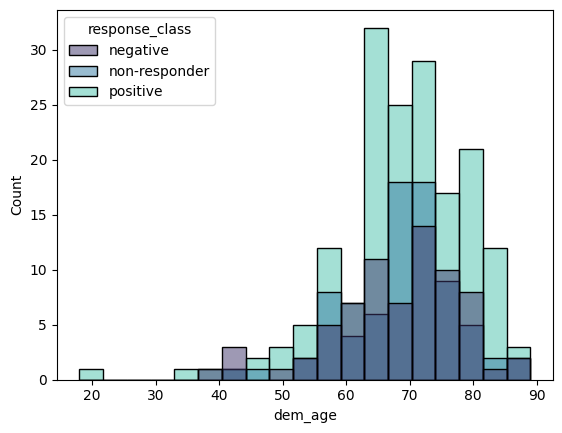

In [150]:
#Difference among groups for age

print("Assumptions Testing for ANOVA:")
print("1. Independence of groups assumption met")
#dist_norm_test = stats.shapiro(resp_df['dem_age'])
#print(dist_norm_test)
model = ols('dem_age ~ C(response_class)', data=resp_df).fit()
norm_test = stats.shapiro(model.resid)
if norm_test.pvalue>0.05:
    print("2. Normal distribution assumption met")
    print(norm_test)
if norm_test.pvalue<0.05:
    print("2. Normal distribution assumption NOT met ** DO NOT PROCEED WITH ANOVA **")
    print(norm_test)
else:
    print("2. ERROR") 
levene_test = stats.levene(resp_df['dem_age'][resp_df['response_class'] == 'positive'],
               resp_df['dem_age'][resp_df['response_class'] == 'negative'],
               resp_df['dem_age'][resp_df['response_class'] == 'non-responder'])
if levene_test.pvalue>0.05:
    print("3. Equal Variances Assumption Met")
else:
    print("3. Equal Varainces assumption NOT Met ** DO NOT PROCEED WITH ANOVA **")

    
print()
print()
print("Test Results:")
print(stats.kruskal(resp_df['dem_age'][resp_df['response_class'] == 'positive'],
               resp_df['dem_age'][resp_df['response_class'] == 'negative'],
               resp_df['dem_age'][resp_df['response_class'] == 'non-responder']))
sns.histplot(data=resp_df, x="dem_age", hue="response_class", palette="mako")
resp_df.groupby('response_class')['dem_age'].describe()

response_class  dem_sex
negative        Female      47
                Male        25
non-responder   Female      41
                Male        35
positive        Female     104
                Male        68
Name: dem_sex, dtype: int64

Number Percentage of females in positive responders: 104.0 60.46511627906976

Number Percentage of females in non-responders: 41.0 53.94736842105263

Number Percentage of females in negative responders: 47.0 65.27777777777779

Chi-Squared test p-value for dem_sex: 0.36581780440128514


<Axes: xlabel='dem_sex', ylabel='Count'>

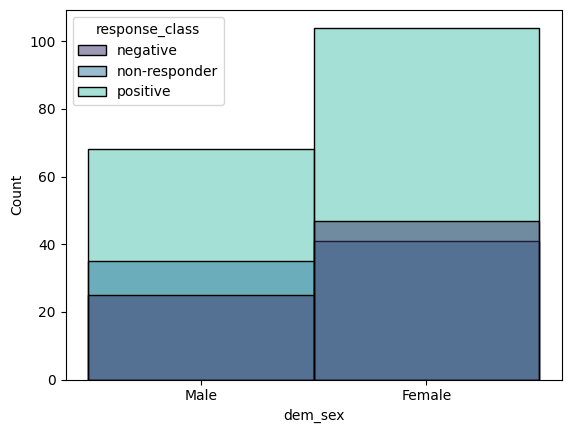

In [151]:
#Difference among groups for dem_sex

warnings.filterwarnings('ignore')
print(resp_df.groupby('response_class')['dem_sex'].value_counts())
resp_df['sex_recode'] = resp_df['dem_sex'].replace('Female',1)
resp_df['sex_recode'] = resp_df['sex_recode'].replace('Male',0)
print()
pos_fem = sum(resp_df['sex_recode'].where(resp_df['response_class']=='positive').dropna(how='all'))
print("Number Percentage of females in positive responders:", pos_fem, pos_fem/len(resp_df['response_class'].where(resp_df['response_class']=='positive').dropna(how='all'))*100)
print()
non_fem = sum(resp_df['sex_recode'].where(resp_df['response_class']=='non-responder').dropna(how='all'))
print("Number Percentage of females in non-responders:", non_fem, non_fem/len(resp_df['response_class'].where(resp_df['response_class']=='non-responder').dropna(how='all'))*100)
print()
neg_fem = sum(resp_df['sex_recode'].where(resp_df['response_class']=='negative').dropna(how='all'))
print("Number Percentage of females in negative responders:", neg_fem, neg_fem/len(resp_df['response_class'].where(resp_df['response_class']=='negative').dropna(how='all'))*100)
print()

contingency_table = pd.crosstab(resp_df['dem_sex'],resp_df['response_class'])
contigency_pct = pd.crosstab(resp_df['dem_sex'], resp_df['response_class'], normalize='index')
c, p, dof, expected = chi2_contingency(contingency_table) 
print("Chi-Squared test p-value for dem_sex:",p)
sns.histplot(data=resp_df, x="dem_sex", hue="response_class", palette="mako")

response_class  dem_race                        
negative        White                                70
                American Indian or Alaska Native      1
                Two or More                           1
non-responder   White                                75
                Other                                 1
positive        White                               169
                Asian                                 1
                Latino/Latina                         1
Name: dem_race, dtype: int64

Number Percentage of females in positive responders: 169.0 98.25581395348837

Number Percentage of females in non-responders: 75.0 98.68421052631578

Number Percentage of females in negative responders: 70.0 97.22222222222221

Chi-Squared test p-value for dem_race: 0.29842780246947703


<Axes: xlabel='race_recode', ylabel='Count'>

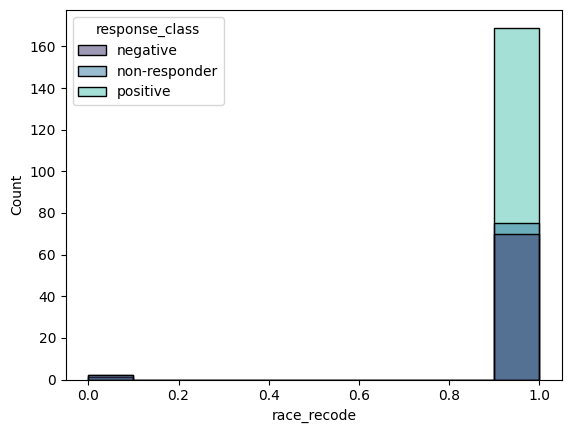

In [152]:
#Difference among groups for dem_race

print(resp_df.groupby('response_class')['dem_race'].value_counts())
resp_df['race_recode'] = resp_df['dem_race'].replace('White',1)
resp_df['race_recode'] = resp_df['race_recode'].replace('American Indian or Alaska Native',0)
resp_df['race_recode'] = resp_df['race_recode'].replace('Two or More',0)
resp_df['race_recode'] = resp_df['race_recode'].replace('Other',0)
resp_df['race_recode'] = resp_df['race_recode'].replace('Asian',0)
resp_df['race_recode'] = resp_df['race_recode'].replace('Latino/Latina',0)
print()
pos_white = sum(resp_df['race_recode'].where(resp_df['response_class']=='positive').dropna(how='all'))
print("Number Percentage of females in positive responders:", pos_white, pos_white/len(resp_df['response_class'].where(resp_df['response_class']=='positive').dropna(how='all'))*100)
print()
non_white = sum(resp_df['race_recode'].where(resp_df['response_class']=='non-responder').dropna(how='all'))
print("Number Percentage of females in non-responders:", non_white, non_white/len(resp_df['response_class'].where(resp_df['response_class']=='non-responder').dropna(how='all'))*100)
print()
neg_white = sum(resp_df['race_recode'].where(resp_df['response_class']=='negative').dropna(how='all'))
print("Number Percentage of females in negative responders:", neg_white, neg_white/len(resp_df['response_class'].where(resp_df['response_class']=='negative').dropna(how='all'))*100)
print()

contingency_table = pd.crosstab(resp_df['dem_race'],resp_df['response_class'])
contigency_pct = pd.crosstab(resp_df['dem_race'], resp_df['response_class'], normalize='index')
c, p, dof, expected = chi2_contingency(contingency_table) 
print("Chi-Squared test p-value for dem_race:",p)
sns.histplot(data=resp_df, x="race_recode", hue="response_class", palette="mako")

Assumptions Testing for ANOVA:
1. Independence of groups assumption met
2. Normal distribution assumption NOT met ** DO NOT PROCEED WITH ANOVA **
ShapiroResult(statistic=0.9174305200576782, pvalue=3.0155101506113002e-12)
3. Equal Varainces assumption NOT Met ** DO NOT PROCEED WITH ANOVA **



Test Results:
KruskalResult(statistic=6.746525218273843, pvalue=0.03427762023185136)

Posthoc Results for BMI
          1         2         3
1  1.000000  0.048068  1.000000
2  0.048068  1.000000  0.078705
3  1.000000  0.078705  1.000000


,count,mean,std,min,25%,50%,75%,max
response_class,,,,,,,,
negative,72.0,28.733372,6.587675,17.968808,24.135795,26.330013,33.113765,48.412289
non-responder,75.0,26.392191,6.071965,17.717617,22.404731,25.601587,29.914753,51.491823
positive,172.0,26.423279,5.620681,16.092426,22.698423,25.397341,29.187022,51.349413


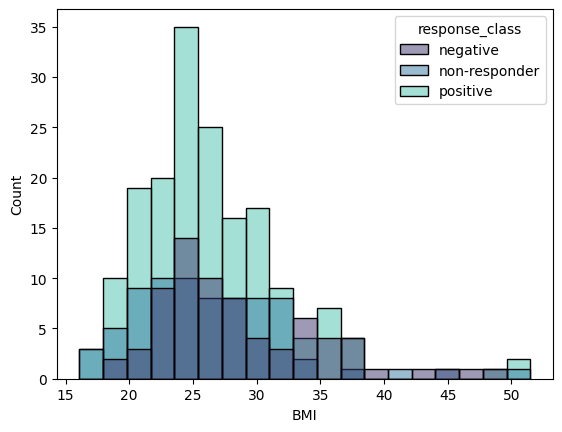

In [149]:
#Difference among groups for BMI

print("Assumptions Testing for ANOVA:")
print("1. Independence of groups assumption met")
#dist_norm_test = stats.shapiro(resp_df['BMI'])
#print(dist_norm_test)
model = ols('BMI ~ C(response_class)', data=resp_df).fit()
norm_test = stats.shapiro(model.resid)
if norm_test.pvalue>0.05:
    print("2. Normal distribution assumption met")
    print(norm_test)
if norm_test.pvalue<0.05:
    print("2. Normal distribution assumption NOT met ** DO NOT PROCEED WITH ANOVA **")
    print(norm_test)
else:
    print("2. ERROR") 
levene_test = stats.levene(resp_df['BMI'][resp_df['response_class'] == 'positive'],
               resp_df['BMI'][resp_df['response_class'] == 'negative'],
               resp_df['BMI'][resp_df['response_class'] == 'non-responder'])
if levene_test.pvalue>0.05:
    print("3. Equal Variances Assumption Met")
else:
    print("3. Equal Varainces assumption NOT Met ** DO NOT PROCEED WITH ANOVA **")

print()   
print()
print()
print("Test Results:")
print(stats.kruskal(resp_df['BMI'][resp_df['response_class'] == 'positive'],
               resp_df['BMI'][resp_df['response_class'] == 'negative'],
               resp_df['BMI'][resp_df['response_class'] == 'non-responder'], 
                    nan_policy='omit'))
print()

#posthoc test for BMI (https://www.statology.org/dunns-test-python/)
BMI_positive = list(resp_df['BMI'].where(resp_df['response_class'] == 'positive').dropna(how=all))
BMI_negative = list(resp_df['BMI'].where(resp_df['response_class'] == 'negative').dropna(how=all))
BMI_non = list(resp_df['BMI'].where(resp_df['response_class'] == 'non-responder').dropna(how=all))
BMI_data = [BMI_positive, BMI_negative, BMI_non]
print("Posthoc Results for BMI")
print(sp.posthoc_dunn(BMI_data, p_adjust = 'bonferroni'))

sns.histplot(data=resp_df, x="BMI", hue="response_class", palette="mako")
#sns.histplot(resp_df, x="BMI", y="response_class", hue="response_class", palette="mako")
resp_df.groupby('response_class')['BMI'].describe()

Assumptions Testing for ANOVA:
1. Independence of groups assumption met
2. Normal distribution assumption NOT met ** DO NOT PROCEED WITH ANOVA **
ShapiroResult(statistic=0.968014121055603, pvalue=1.631718532735249e-06)
3. Equal Varainces assumption NOT Met ** DO NOT PROCEED WITH ANOVA **


Test Results:
KruskalResult(statistic=1.0323188967905481, pvalue=0.5968082249736326)


,count,mean,std,min,25%,50%,75%,max
response_class,,,,,,,,
negative,72.0,32.305556,18.105045,1.0,20.0,30.0,45.00,80.0
non-responder,76.0,29.618421,15.524576,1.0,18.5,30.0,38.25,66.0
positive,172.0,30.023256,19.418431,1.0,13.5,27.0,45.00,75.0


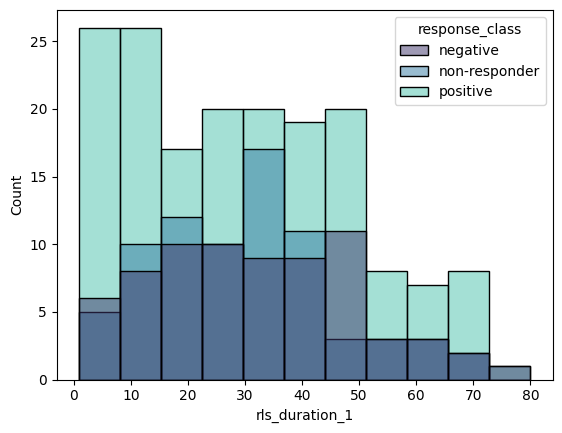

In [147]:
#Difference among groups for RLS Duration

print("Assumptions Testing for ANOVA:")
print("1. Independence of groups assumption met")
#dist_norm_test = stats.shapiro(resp_df['rls_duration_1'])
#print(dist_norm_test)
model = ols('rls_duration_1 ~ C(response_class)', data=resp_df).fit()
norm_test = stats.shapiro(model.resid)
if norm_test.pvalue>0.05:
    print("2. Normal distribution assumption met")
    print(norm_test)
if norm_test.pvalue<0.05:
    print("2. Normal distribution assumption NOT met ** DO NOT PROCEED WITH ANOVA **")
    print(norm_test)
else:
    print("2. ERROR") 
levene_test = stats.levene(resp_df['rls_duration_1'][resp_df['response_class'] == 'positive'],
               resp_df['rls_duration_1'][resp_df['response_class'] == 'negative'],
               resp_df['rls_duration_1'][resp_df['response_class'] == 'non-responder'])
if levene_test.pvalue>0.05:
    print("3. Equal Variances Assumption Met")
else:
    print("3. Equal Varainces assumption NOT Met ** DO NOT PROCEED WITH ANOVA **")

    
print()
print()
print("Test Results:")
print(stats.kruskal(resp_df['rls_duration_1'][resp_df['response_class'] == 'positive'],
               resp_df['rls_duration_1'][resp_df['response_class'] == 'negative'],
               resp_df['rls_duration_1'][resp_df['response_class'] == 'non-responder']))

sns.histplot(data=resp_df, x="rls_duration_1", hue="response_class", palette="mako")
resp_df.groupby('response_class')['rls_duration_1'].describe()

Assumptions Testing for ANOVA:
1. Independence of groups assumption met
2. Normal distribution assumption NOT met ** DO NOT PROCEED WITH ANOVA **
ShapiroResult(statistic=0.9904403686523438, pvalue=0.035168781876564026)
3. Equal Variances Assumption Met


Test Results:
KruskalResult(statistic=6.837239348565474, pvalue=0.032757619932070166)

          1         2         3
1  1.000000  0.028705  0.795111
2  0.028705  1.000000  0.603742
3  0.795111  0.603742  1.000000


,count,mean,std,min,25%,50%,75%,max
response_class,,,,,,,,
negative,72.0,22.680556,8.115064,0.0,18.0,23.0,28.00,39.0
non-responder,76.0,20.842105,8.630261,1.0,16.0,21.0,27.00,39.0
positive,172.0,19.598837,8.257309,0.0,15.0,20.0,25.25,39.0


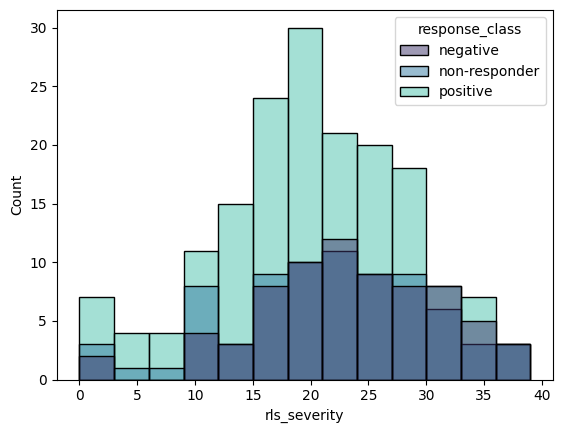

In [148]:
#Difference among groups for RLS Severity

print("Assumptions Testing for ANOVA:")
print("1. Independence of groups assumption met")
#dist_norm_test = stats.shapiro(resp_df['rls_severity'])
#print(dist_norm_test)
model = ols('rls_severity ~ C(response_class)', data=resp_df).fit()
norm_test = stats.shapiro(model.resid)
if norm_test.pvalue>0.05:
    print("2. Normal distribution assumption met")
    print(norm_test)
if norm_test.pvalue<0.05:
    print("2. Normal distribution assumption NOT met ** DO NOT PROCEED WITH ANOVA **")
    print(norm_test)
else:
    print("2. ERROR") 
levene_test = stats.levene(resp_df['rls_severity'][resp_df['response_class'] == 'positive'],
               resp_df['rls_severity'][resp_df['response_class'] == 'negative'],
               resp_df['rls_severity'][resp_df['response_class'] == 'non-responder'])
if levene_test.pvalue>0.05:
    print("3. Equal Variances Assumption Met")
else:
    print("3. Equal Varainces assumption NOT Met ** DO NOT PROCEED WITH ANOVA **")

    
print()
print()
print("Test Results:")
print(stats.kruskal(resp_df['rls_severity'][resp_df['response_class'] == 'positive'],
               resp_df['rls_severity'][resp_df['response_class'] == 'negative'],
               resp_df['rls_severity'][resp_df['response_class'] == 'non-responder']))
print()

#Dunn's test for posthoc analysis of RLS severity (https://www.statology.org/dunns-test-python/)
sev_positive = list(resp_df['rls_severity'].where(resp_df['response_class'] == 'positive').dropna(how=all))
sev_negative = list(resp_df['rls_severity'].where(resp_df['response_class'] == 'negative').dropna(how=all))
sev_non = list(resp_df['rls_severity'].where(resp_df['response_class'] == 'non-responder').dropna(how=all))
sev_data = [sev_positive, sev_negative, sev_non]

print(sp.posthoc_dunn(sev_data, p_adjust = 'bonferroni'))

sns.histplot(data=resp_df, x="rls_severity", hue="response_class", palette="mako")#, multiple="stack")
#sns.histplot(resp_df, x="rls_severity", y="response_class", hue="response_class", palette="mako")
resp_df.groupby('response_class')['rls_severity'].describe()

Assumptions Testing for ANOVA:
1. Independence of groups assumption met
2. Normal distribution assumption NOT met ** DO NOT PROCEED WITH ANOVA **
ShapiroResult(statistic=0.8459334969520569, pvalue=8.32878828182334e-17)
3. Equal Varainces assumption NOT Met ** DO NOT PROCEED WITH ANOVA **


Test Results:
KruskalResult(statistic=nan, pvalue=nan)


,count,mean,std,min,25%,50%,75%,max
response_class,,,,,,,,
negative,68.0,17.308824,5.381720,1.0,16.0,19.0,21.0,24.0
non-responder,70.0,17.485714,5.643369,1.0,16.0,20.0,21.0,23.0
positive,168.0,17.726190,5.252547,1.0,15.0,19.0,21.0,24.0


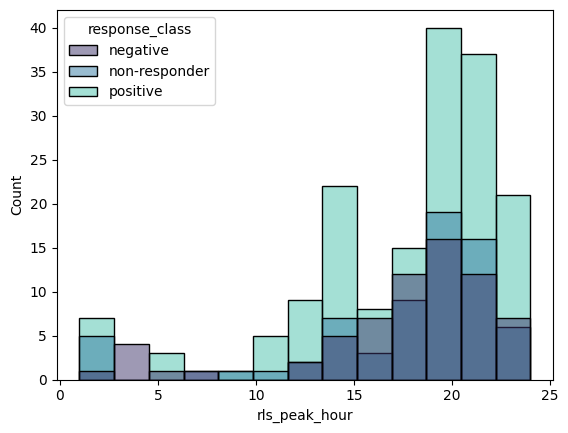

In [153]:
#Difference among groups for RLS Onset/Peak Time

print("Assumptions Testing for ANOVA:")
print("1. Independence of groups assumption met")
#dist_norm_test = stats.shapiro(resp_df['rls_peak_hour'])
#print(dist_norm_test)
model = ols('rls_peak_hour ~ C(response_class)', data=resp_df).fit()
norm_test = stats.shapiro(model.resid)
if norm_test.pvalue>0.05:
    print("2. Normal distribution assumption met")
    print(norm_test)
if norm_test.pvalue<0.05:
    print("2. Normal distribution assumption NOT met ** DO NOT PROCEED WITH ANOVA **")
    print(norm_test)
else:
    print("2. ERROR") 
levene_test = stats.levene(resp_df['rls_peak_hour'][resp_df['response_class'] == 'positive'],
               resp_df['rls_peak_hour'][resp_df['response_class'] == 'negative'],
               resp_df['rls_peak_hour'][resp_df['response_class'] == 'non-responder'])
if levene_test.pvalue>0.05:
    print("3. Equal Variances Assumption Met")
else:
    print("3. Equal Varainces assumption NOT Met ** DO NOT PROCEED WITH ANOVA **")

    
print()
print()
print("Test Results:")
print(stats.kruskal(resp_df['rls_peak_hour'][resp_df['response_class'] == 'positive'],
               resp_df['rls_peak_hour'][resp_df['response_class'] == 'negative'],
               resp_df['rls_peak_hour'][resp_df['response_class'] == 'non-responder']))
print()
sns.histplot(data=resp_df, x="rls_peak_hour", hue="response_class", palette="mako")
resp_df.groupby('response_class')['rls_peak_hour'].describe()

response_class  rls_bilateral                                       
negative        Both Sides (Ex. you get RLS symptoms in both legs)       70
                Only on Right (Ex. only your right leg has symptoms)      2
non-responder   Both Sides (Ex. you get RLS symptoms in both legs)       72
                Only on Left (Ex: only your left leg has symptoms)        3
                Only on Right (Ex. only your right leg has symptoms)      1
positive        Both Sides (Ex. you get RLS symptoms in both legs)      163
                Only on Left (Ex: only your left leg has symptoms)        6
                Only on Right (Ex. only your right leg has symptoms)      3
Name: rls_bilateral, dtype: int64

Number Percentage of bilateral in positive responders: 163.0 94.76744186046511

Number Percentage of bilateral in non-responders: 72.0 94.73684210526315

Number Percentage of bilateral in negative responders: 70.0 97.22222222222221

Chi-Squared test p-value for rls_bilateral: 0.534128282

<Axes: xlabel='bilateral_recode', ylabel='Count'>

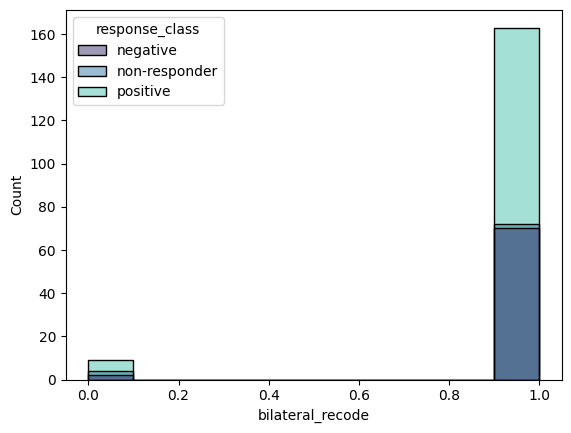

In [155]:
#Differences among groups for RLS unilateral or bilateral (1= Only Left; 2=Only Right; 3=Bilateral)

print(resp_df.groupby('response_class')['rls_bilateral'].value_counts())
resp_df['bilateral_recode'] = resp_df['rls_bilateral'].replace('Only on Left (Ex: only your left leg has symptoms)',0)
resp_df['bilateral_recode'] = resp_df['bilateral_recode'].replace('Only on Right (Ex. only your right leg has symptoms)',0)
resp_df['bilateral_recode'] = resp_df['bilateral_recode'].replace('Both Sides (Ex. you get RLS symptoms in both legs)',1)
print()
pos_bilateral = sum(resp_df['bilateral_recode'].where(resp_df['response_class']=='positive').dropna(how='all'))
print("Number Percentage of bilateral in positive responders:", pos_bilateral, pos_bilateral/len(resp_df['response_class'].where(resp_df['response_class']=='positive').dropna(how='all'))*100)
print()
non_bilateral = sum(resp_df['bilateral_recode'].where(resp_df['response_class']=='non-responder').dropna(how='all'))
print("Number Percentage of bilateral in non-responders:", non_bilateral, non_bilateral/len(resp_df['response_class'].where(resp_df['response_class']=='non-responder').dropna(how='all'))*100)
print()
neg_bilateral = sum(resp_df['bilateral_recode'].where(resp_df['response_class']=='negative').dropna(how='all'))
print("Number Percentage of bilateral in negative responders:", neg_bilateral, neg_bilateral/len(resp_df['response_class'].where(resp_df['response_class']=='negative').dropna(how='all'))*100)
print()

contingency_table = pd.crosstab(resp_df['rls_bilateral'],resp_df['response_class'])
contigency_pct = pd.crosstab(resp_df['rls_bilateral'], resp_df['response_class'], normalize='index')
c, p, dof, expected = chi2_contingency(contingency_table) 
print("Chi-Squared test p-value for rls_bilateral:",p)

sns.histplot(data=resp_df, x="bilateral_recode", hue="response_class", palette="mako")

response_class  rls_pregnancy_start
negative         0.0                   40
                 1.0                    6
                -55.0                   1
non-responder    0.0                   33
                -55.0                   5
                 1.0                    3
positive         0.0                   79
                -55.0                  17
                 1.0                    8
Name: rls_pregnancy_start, dtype: int64

Number of pregnancy in positive responders: 8.0 7.6923076923076925

Number of pregnancy in non-responders: 3.0 7.317073170731707

Number  of pregnancy in negative responders: 6.0 12.76595744680851

Chi-Squared test p-value for rls_pregnancy_start: 0.14133615420680332


<Axes: xlabel='pregnancy_recode', ylabel='Count'>

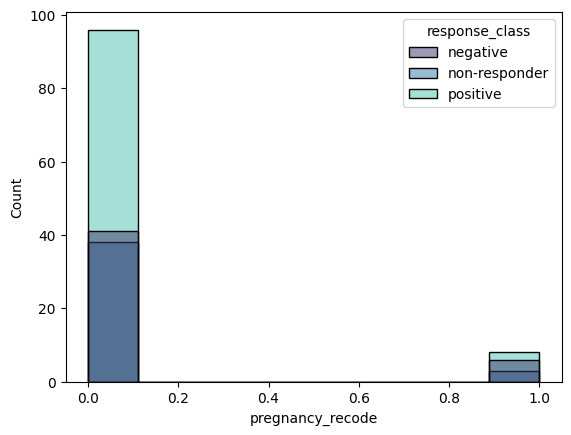

In [156]:
#rls_pregnancy_start

print(resp_df.groupby('response_class')['rls_pregnancy_start'].value_counts())
resp_df['pregnancy_recode'] = resp_df['rls_pregnancy_start'].replace(-55.0,0)
#resp_df['pregnancy_recode'] = resp_df['pregnancy_recode'].replace('Only on Right (Ex. only your right leg has symptoms)',0)
#resp_df['pregnancy_recode'] = resp_df['pregnancy_recode'].replace('Both Sides (Ex. you get RLS symptoms in both legs)',1)
print()
pos_pregnancy = sum(resp_df['pregnancy_recode'].where(resp_df['response_class']=='positive').dropna(how='all'))
print("Number of pregnancy in positive responders:", pos_pregnancy, (pos_pregnancy/(79+17+8))*100)
print()
non_pregnancy = sum(resp_df['pregnancy_recode'].where(resp_df['response_class']=='non-responder').dropna(how='all'))
print("Number of pregnancy in non-responders:", non_pregnancy, (non_pregnancy/(33+5+3))*100)
print()
neg_pregnancy = sum(resp_df['pregnancy_recode'].where(resp_df['response_class']=='negative').dropna(how='all'))
print("Number  of pregnancy in negative responders:", neg_pregnancy, (neg_pregnancy/(40+6+1))*100)
print()

contingency_table = pd.crosstab(resp_df['rls_pregnancy_start'],resp_df['response_class'])
contigency_pct = pd.crosstab(resp_df['rls_pregnancy_start'], resp_df['response_class'], normalize='index')
c, p, dof, expected = chi2_contingency(contingency_table) 
print("Chi-Squared test p-value for rls_pregnancy_start:",p)
sns.histplot(data=resp_df, x="pregnancy_recode", hue="response_class", palette="mako")

response_class  rls_treated
negative        1.0             63
                0.0              9
non-responder   1.0             73
                0.0              3
positive        1.0            150
                0.0             22
Name: rls_treated, dtype: int64

Number of treated in positive responders: 150.0 87.20930232558139

Number of treated in non-responders: 73.0 96.05263157894737

Number  of treated in negative responders: 63.0 87.5

Chi-Squared test p-value for rls_treated: 0.0960959493861805


<Axes: xlabel='rls_treated', ylabel='Count'>

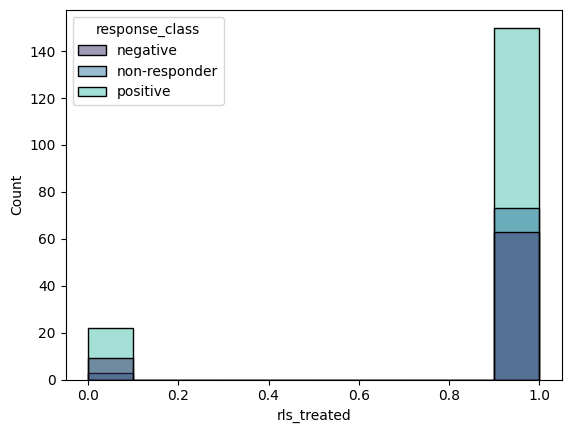

In [157]:
#RLS medication use

print(resp_df.groupby('response_class')['rls_treated'].value_counts())
print()
pos_treated = sum(resp_df['rls_treated'].where(resp_df['response_class']=='positive').dropna(how='all'))
print("Number of treated in positive responders:", pos_treated, (pos_treated/(150+22))*100)
print()
non_treated = sum(resp_df['rls_treated'].where(resp_df['response_class']=='non-responder').dropna(how='all'))
print("Number of treated in non-responders:", non_treated, (non_treated/(73+3))*100)
print()
neg_treated = sum(resp_df['rls_treated'].where(resp_df['response_class']=='negative').dropna(how='all'))
print("Number  of treated in negative responders:", neg_treated, (neg_treated/(63+9))*100)
print()

contingency_table = pd.crosstab(resp_df['rls_treated'],resp_df['response_class'])
contigency_pct = pd.crosstab(resp_df['rls_treated'], resp_df['response_class'], normalize='index')
c, p, dof, expected = chi2_contingency(contingency_table) 
print("Chi-Squared test p-value for rls_treated:",p)

sns.histplot(data=resp_df, x="rls_treated", hue="response_class", palette="mako")

response_class  rls_med_responsive          
negative        Partially Relieves Symptoms      53
                Completely Relieves Symptoms     10
non-responder   Partially Relieves Symptoms      47
                Completely Relieves Symptoms     25
                No Relief of Symptoms             1
positive        Partially Relieves Symptoms     105
                Completely Relieves Symptoms     41
                No Relief of Symptoms             4
Name: rls_med_responsive, dtype: int64

Number Percentage of med_resp in positive responders: 4.0 2.3255813953488373

Number Percentage of med_resp in non-responders: 1.0 1.3157894736842104

Number Percentage of med_resp in negative responders: 0.0 0.0

Chi-Squared test p-value for rls_med_responsive: 0.08410054651825667


<Axes: xlabel='med_resp_recode', ylabel='Count'>

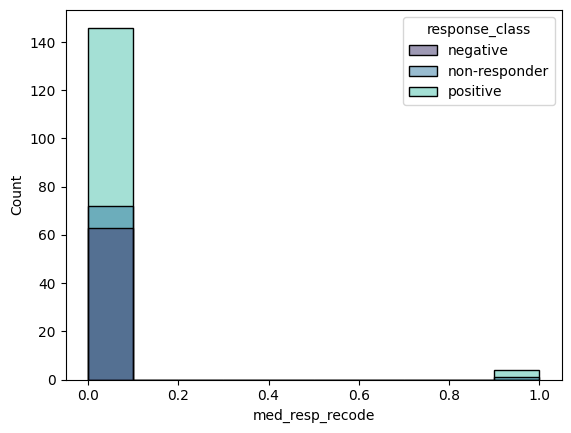

In [158]:
#Perceived responsiveness to RLS medications (recode into 0=partial/complete relief (responsive) and 1=no relieve (non-responsive))

print(resp_df.groupby('response_class')['rls_med_responsive'].value_counts())
resp_df['med_resp_recode'] = resp_df['rls_med_responsive'].replace('Partially Relieves Symptoms',0)
resp_df['med_resp_recode'] = resp_df['med_resp_recode'].replace('Completely Relieves Symptoms',0)
resp_df['med_resp_recode'] = resp_df['med_resp_recode'].replace('No Relief of Symptoms',1)
print()
pos_med_resp = sum(resp_df['med_resp_recode'].where(resp_df['response_class']=='positive').dropna(how='all'))
print("Number Percentage of med_resp in positive responders:", pos_med_resp, pos_med_resp/len(resp_df['response_class'].where(resp_df['response_class']=='positive').dropna(how='all'))*100)
print()
non_med_resp = sum(resp_df['med_resp_recode'].where(resp_df['response_class']=='non-responder').dropna(how='all'))
print("Number Percentage of med_resp in non-responders:", non_med_resp, non_med_resp/len(resp_df['response_class'].where(resp_df['response_class']=='non-responder').dropna(how='all'))*100)
print()
neg_med_resp = sum(resp_df['med_resp_recode'].where(resp_df['response_class']=='negative').dropna(how='all'))
print("Number Percentage of med_resp in negative responders:", neg_med_resp, neg_med_resp/len(resp_df['response_class'].where(resp_df['response_class']=='negative').dropna(how='all'))*100)
print()

contingency_table = pd.crosstab(resp_df['rls_med_responsive'],resp_df['response_class'])
contigency_pct = pd.crosstab(resp_df['rls_med_responsive'], resp_df['response_class'], normalize='index')
c, p, dof, expected = chi2_contingency(contingency_table) 
print("Chi-Squared test p-value for rls_med_responsive:",p)

sns.histplot(data=resp_df, x="med_resp_recode", hue="response_class", palette="mako")

response_class  rls_med_frequency
negative        Regularly             61
                As Needed              2
non-responder   Regularly             69
                As Needed              4
positive        Regularly            142
                As Needed              8
Name: rls_med_frequency, dtype: int64

Number Percentage of med_freq in positive responders: 142.0 94.66666666666667

Number Percentage of med_freq in non-responders: 69.0 94.52054794520548

Number Percentage of med_freq in negative responders: 61.0 96.82539682539682

Chi-Squared test p-value for rls_med_frequency: 0.7725966621578423


<Axes: xlabel='med_freq_recode', ylabel='Count'>

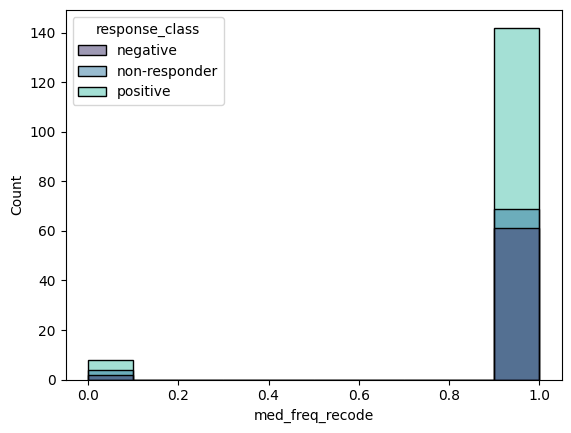

In [159]:
#frequency of RLS medication use (recode into 0=regularly, 1 = as needed)

print(resp_df.groupby('response_class')['rls_med_frequency'].value_counts())
resp_df['med_freq_recode'] = resp_df['rls_med_frequency'].replace('Regularly',1)
resp_df['med_freq_recode'] = resp_df['med_freq_recode'].replace('As Needed',0)
print()
pos_med_freq = sum(resp_df['med_freq_recode'].where(resp_df['response_class']=='positive').dropna(how='all'))
print("Number Percentage of med_freq in positive responders:", pos_med_freq, pos_med_freq/(142+8)*100)
print()
non_med_freq = sum(resp_df['med_freq_recode'].where(resp_df['response_class']=='non-responder').dropna(how='all'))
print("Number Percentage of med_freq in non-responders:", non_med_freq, non_med_freq/(69+4)*100)
print()
neg_med_freq = sum(resp_df['med_freq_recode'].where(resp_df['response_class']=='negative').dropna(how='all'))
print("Number Percentage of med_freq in negative responders:", neg_med_freq, neg_med_freq/(61+2)*100)
print()

contingency_table = pd.crosstab(resp_df['rls_med_frequency'],resp_df['response_class'])
contigency_pct = pd.crosstab(resp_df['rls_med_frequency'], resp_df['response_class'], normalize='index')
c, p, dof, expected = chi2_contingency(contingency_table) 
print("Chi-Squared test p-value for rls_med_frequency:",p)

sns.histplot(data=resp_df, x="med_freq_recode", hue="response_class", palette="mako")

response_class  secondary_conditions
negative         0.0                     54
                 1.0                     17
                -55.0                     1
non-responder    0.0                     62
                 1.0                     14
positive         0.0                    114
                 1.0                     53
                -55.0                     4
Name: secondary_conditions, dtype: int64

Number Percentage of secondary conditions in positive responders: 53 30.994152046783626

Number Percentage of secondary conditions in non-responders: 14 18.421052631578945

Number Percentage of secondary conditions in negative responders: 17 23.61111111111111

Chi-Squared test p-value for secondary_conditions: 0.1355119931015271


<Axes: xlabel='secondary_conditions', ylabel='Count'>

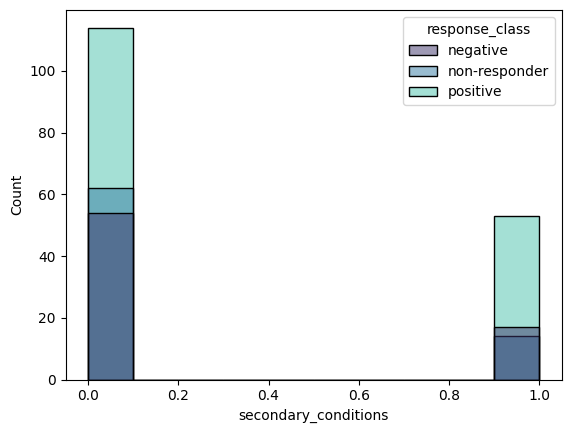

In [162]:
#Presence of secondary conditions

print(resp_df.groupby('response_class')['secondary_conditions'].value_counts())
print()
print("Number Percentage of secondary conditions in positive responders:",53, 53/(53+114+4)*100)
print()
print("Number Percentage of secondary conditions in non-responders:", 14, 14/(14+62)*100)
print()
print("Number Percentage of secondary conditions in negative responders:", 17, 17/(54+17+1)*100)
print()

contingency_table = pd.crosstab(resp_df['secondary_conditions'],resp_df['response_class'])
contigency_pct = pd.crosstab(resp_df['secondary_conditions'], resp_df['response_class'], normalize='index')
c, p, dof, expected = chi2_contingency(contingency_table) 
print("Chi-Squared test p-value for secondary_conditions:",p)

sns.histplot(data=resp_df.where(resp_df['secondary_conditions']>=0), x="secondary_conditions", hue="response_class", palette="mako")

response_class  plm_presence
negative         1.0             54
                -55.0             9
                 0.0              9
non-responder    1.0             54
                 0.0             16
                -55.0             6
positive         1.0            104
                 0.0             53
                -55.0            15
Name: plm_presence, dtype: int64

Number Percentage of PLMs in positive responders: 104 60.46511627906976

Number Percentage of PLMs in non-responders: 54 71.05263157894737

Number Percentage of PLMs in negative responders: 54 75.0

Chi-Squared test p-value for plm_presence: 0.034105851126300255
Chi-Squared test p-value for plm_presence between positive and negative: 0.010608742145060203
Chi-Squared test p-value for plm_presence between positive and non-responders: 0.2496937917767145
Chi-Squared test p-value for plm_presence between negative and non-responders: 0.2932170658233831


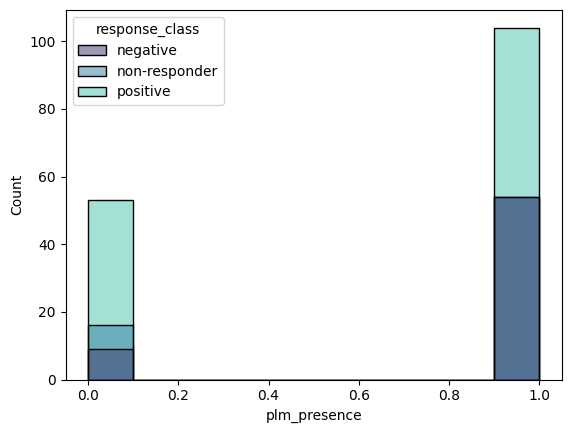

In [166]:
#Presence of PLMs

print(resp_df.groupby('response_class')['plm_presence'].value_counts())
print()
print("Number Percentage of PLMs in positive responders:", 104, 104/(104+53+15)*100)
print()
print("Number Percentage of PLMs in non-responders:", 54, 54/(54+16+6)*100)
print()
print("Number Percentage of PLMs in negative responders:", 54, 54/(54+9+9)*100)
print()

contingency_table = pd.crosstab(resp_df['plm_presence'],resp_df['response_class'])
contigency_pct = pd.crosstab(resp_df['plm_presence'], resp_df['response_class'], normalize='index')
c, p, dof, expected = chi2_contingency(contingency_table) 
print("Chi-Squared test p-value for plm_presence:",p)

sns.histplot(data=resp_df.where(resp_df['plm_presence']>=0), x="plm_presence", hue="response_class", palette="mako")
contigency_pct
#multiple chi squares for post-hoc
neg_pos = resp_df[resp_df['response_class']!='non-responder']
non_pos = resp_df[resp_df['response_class']!='negative']
neg_non = resp_df[resp_df['response_class']!='positive']

contingency_table = pd.crosstab(neg_pos['plm_presence'],neg_pos['response_class'])
c, p, dof, expected = chi2_contingency(contingency_table) 
print("Chi-Squared test p-value for plm_presence between positive and negative:",p)

contingency_table = pd.crosstab(non_pos['plm_presence'],non_pos['response_class'])
c, p, dof, expected = chi2_contingency(contingency_table) 
print("Chi-Squared test p-value for plm_presence between positive and non-responders:",p)

contingency_table = pd.crosstab(neg_non['plm_presence'],neg_non['response_class'])
c, p, dof, expected = chi2_contingency(contingency_table) 
print("Chi-Squared test p-value for plm_presence between negative and non-responders:",p)

Assumptions Testing for ANOVA:
1. Independence of groups assumption met
2. Normal distribution assumption NOT met ** DO NOT PROCEED WITH ANOVA **
ShapiroResult(statistic=0.9695016741752625, pvalue=2.794474312395323e-06)
3. Equal Variances Assumption Met


Test Results:
KruskalResult(statistic=4.748082643150055, pvalue=0.0931037029514911)


,count,mean,std,min,25%,50%,75%,max
response_class,,,,,,,,
negative,72.0,43.255556,24.380262,0.0,23.1,40.50,59.625,99.1
non-responder,76.0,44.203947,27.083660,0.0,23.1,35.10,67.100,107.1
positive,172.0,50.358140,26.842259,0.0,28.5,48.15,67.100,107.1


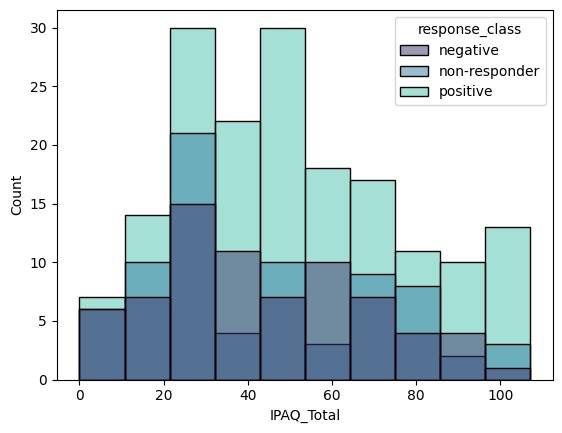

In [167]:
#Difference among groups for Physical Activity Levels

print("Assumptions Testing for ANOVA:")
print("1. Independence of groups assumption met")
#dist_norm_test = stats.shapiro(resp_df['IPAQ_Total'])
#print(dist_norm_test)
model = ols('IPAQ_Total ~ C(response_class)', data=resp_df).fit()
norm_test = stats.shapiro(model.resid)
if norm_test.pvalue>0.05:
    print("2. Normal distribution assumption met")
    print(norm_test)
if norm_test.pvalue<0.05:
    print("2. Normal distribution assumption NOT met ** DO NOT PROCEED WITH ANOVA **")
    print(norm_test)
else:
    print("2. ERROR") 
levene_test = stats.levene(resp_df['IPAQ_Total'][resp_df['response_class'] == 'positive'],
               resp_df['IPAQ_Total'][resp_df['response_class'] == 'negative'],
               resp_df['IPAQ_Total'][resp_df['response_class'] == 'non-responder'])
if levene_test.pvalue>0.05:
    print("3. Equal Variances Assumption Met")
else:
    print("3. Equal Varainces assumption NOT Met ** DO NOT PROCEED WITH ANOVA **")

    
print()
print()
print("Test Results:")
print(stats.kruskal(resp_df['IPAQ_Total'][resp_df['response_class'] == 'positive'],
               resp_df['IPAQ_Total'][resp_df['response_class'] == 'negative'],
               resp_df['IPAQ_Total'][resp_df['response_class'] == 'non-responder']))
sns.histplot(data=resp_df, x="IPAQ_Total", hue="response_class", palette="mako")

resp_df.groupby('response_class')['IPAQ_Total'].describe()


Assumptions Testing for ANOVA:
1. Independence of groups assumption met
2. Normal distribution assumption NOT met ** DO NOT PROCEED WITH ANOVA **
3. Equal Varainces assumption NOT Met ** DO NOT PROCEED WITH ANOVA **


Test Results:
KruskalResult(statistic=2.529323263116371, pvalue=0.28233481317044024)


,count,mean,std,min,25%,50%,75%,max
response_class,,,,,,,,
negative,68.0,6.474020,3.683235,1.0,4.0,6.0,8.625,21.0
non-responder,74.0,5.693018,2.992179,1.0,4.0,5.0,7.000,20.0
positive,162.0,6.360905,3.320174,0.5,4.0,6.0,8.000,20.0


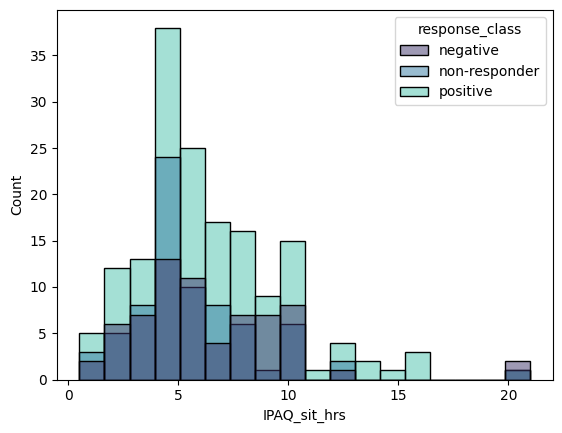

In [171]:
#IPAQ_sit_hrs
#Difference among groups for sedentary Levels

print("Assumptions Testing for ANOVA:")
print("1. Independence of groups assumption met")
#print(stats.shapiro(resp_df['IPAQ_sit_hrs']))
model = ols('IPAQ_sit_hrs ~ C(response_class)', data=resp_df).fit()
norm_test = stats.shapiro(model.resid)
if norm_test.pvalue>0.05:
    print("2. Normal distribution assumption met")
else:
    print("2. Normal distribution assumption NOT met ** DO NOT PROCEED WITH ANOVA **") 
levene_test = stats.levene(resp_df['IPAQ_sit_hrs'][resp_df['response_class'] == 'positive'],
               resp_df['IPAQ_sit_hrs'][resp_df['response_class'] == 'negative'],
               resp_df['IPAQ_sit_hrs'][resp_df['response_class'] == 'non-responder'])
if levene_test.pvalue>0.05:
    print("3. Equal Variances Assumption Met")
else:
    print("3. Equal Varainces assumption NOT Met ** DO NOT PROCEED WITH ANOVA **")

    
print()
print()
print("Test Results:")
sit_df = resp_df.dropna(subset=['IPAQ_sit_hrs'])
print(stats.kruskal(sit_df['IPAQ_sit_hrs'][sit_df['response_class'] == 'positive'],
               sit_df['IPAQ_sit_hrs'][sit_df['response_class'] == 'negative'],
               sit_df['IPAQ_sit_hrs'][sit_df['response_class'] == 'non-responder']))

sns.histplot(resp_df, x="IPAQ_sit_hrs", hue="response_class", palette="mako")

resp_df.groupby('response_class')['IPAQ_sit_hrs'].describe()


# Machine Learning Classifier